<a href="https://colab.research.google.com/github/Leostark95/Introduccion_IA/blob/main/content/NOTES%2004.03%20-%20SIMPLE%20HYPOTHESIS%20TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04.03 - HYPOTHESIS TESTING

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
%matplotlib inline

## Stochastic models

A probabilistic (or stochastic) model is one that assigns probabilities to the different objects or events it attempts to describe. For instance,

- The probability of a patient to have different glucose levels.
- The probability of students to obtain different scores in an exam


A stochastic model

- Just provides a probability for each object (a number between 0 and 1)
- Does not necessarily provide an explanation on **HOW** probabilities arise.
- Is given as a **probability distribution** with its corresponding PDF (**probability density function**), by which we can compute any probability



## Confidence on models

### STEP 1: Define the model you want to challenge (the NULL  Hypothesis $H_0$)


A researcher brings a stochastic model claiming that students' scores in a certain exam follow a normal distribution with $\mu=100$ and $\sigma=15$.

Text(0, 0.5, 'probability')

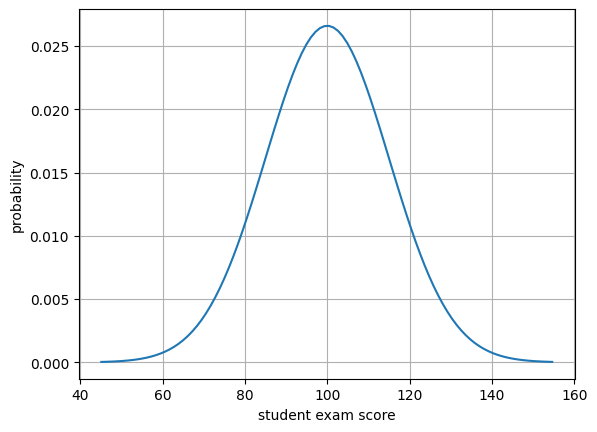

In [3]:
h0 = stats.norm(loc=100, scale=15)
x = h0.rvs(10000)
rx = np.linspace(np.min(x), np.max(x), 100)
plt.plot(rx, h0.pdf(rx))
plt.grid(); plt.xlabel("student exam score"); plt.ylabel("probability")

You are **NOT SURE** if the model works well with your students, so you start looking (**sampling**) at their exam scores. How much would you trust the model in the following cases:

- H1: You sample 5 students and their average score is 110
- H2: You sample 5 students and their average score is 105
- H3: You sample 30 students and their average score is 105

### STEP 2: Define your REAL WORLD sample and your test statistic

The test statistic is what you **are interesting** in computing from a real world sample.

- **SAMPLE**: a set of 5 students.

- **TEST STATISTIC**: the average exam score of the sample

### STEP 3: Understand the TEST STATISTIC distribution under  $H_0$ (if the model is True)


#### We will NOT USE FORMULAS, only SIMULATION

Let's assume the model is right, let's **SIMULATE** we select 5 students from the model's probability distribution. We do **10 simulations**.

Run the cells below several times, and ask yourself the following questions:

- how probable is that you see 5 students with average score 110 or higher?
- how probable is that you see 5 students with average score 105 or higher?


In [4]:
m = stats.norm(loc=100, scale=15)

In [10]:
for n in range(40):
    s = m.rvs(5)
    print ("sample %2d: "%n+ " ".join(["%5.1f"%i for i in s]), " mean: %7.2f"%np.mean(s))

sample  0: 117.2  84.6  91.4  79.1  76.9  mean:   89.86
sample  1: 105.3  89.6  96.0 104.6 109.7  mean:  101.04
sample  2: 102.1  70.4 110.8  86.3 112.3  mean:   96.37
sample  3:  72.0  82.1 103.3  72.7  87.6  mean:   83.55
sample  4:  92.9  75.5  88.4  92.3  83.1  mean:   86.45
sample  5:  96.7 101.3 108.2  96.7 116.7  mean:  103.91
sample  6:  97.1  83.8  94.0  76.2  88.4  mean:   87.88
sample  7: 111.2 100.8  89.4  95.4  86.3  mean:   96.61
sample  8: 111.5  95.5 104.0  83.9  88.6  mean:   96.71
sample  9: 117.4 120.7  82.9 107.7  95.4  mean:  104.82
sample 10:  79.5 104.4  73.7 118.1  86.6  mean:   92.43
sample 11:  86.7  96.5 105.5  97.0 106.1  mean:   98.37
sample 12:  94.3 103.9  90.2  81.8 113.8  mean:   96.80
sample 13: 117.4  86.4  97.4  73.9  86.7  mean:   92.37
sample 14: 109.8 100.8 117.1  90.1  92.4  mean:  102.03
sample 15:  72.7  98.6 136.8  84.7  87.4  mean:   96.05
sample 16:  98.5 130.9  97.7 122.6 114.3  mean:  112.78
sample 17:  97.6 103.3  97.6  92.2  95.7  mean: 

let's do the simulation **10000 times** and answer the questions

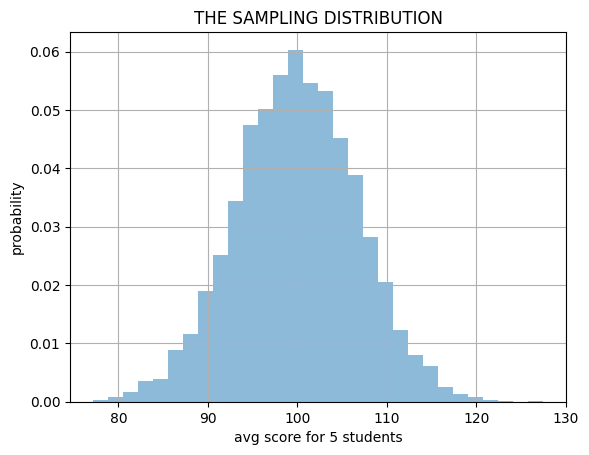

In [11]:
z = np.r_[[np.mean(m.rvs(5)) for _ in range(10000)]]

plt.hist(z, bins=30, density=True, alpha=.5);
plt.grid(); plt.xlabel("avg score for 5 students"); plt.ylabel("probability")
plt.title("THE SAMPLING DISTRIBUTION"); plt.show()

### STEP 4: measure the likelihood of the REAL WORLD sample w.r.t. $H_0$

let's see and measure where our REAL WORLD sample falls in the distribution for the test statistic under $H_0$

- if our REAL WORLD sample is too rare $\rightarrow$ we have less trust in the $H_0$ model
- if our REAL WORLD sample is common $\rightarrow$ we have more trust in the $H_0$ model

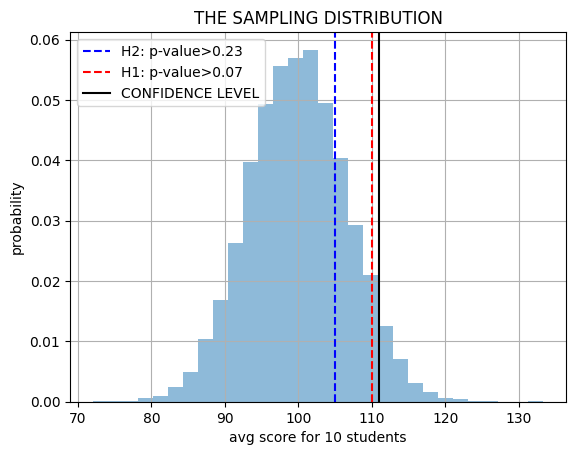

In [12]:
z = np.r_[[np.mean(m.rvs(5)) for _ in range(10000)]]

plt.hist(z, bins=30, density=True, alpha=.5);
plt.axvline(105, color="blue", ls="--", label="H2: p-value>%.2f"%np.mean(z>105))
plt.axvline(110, color="red", ls="--", label="H1: p-value>%.2f"%np.mean(z>110))
plt.axvline(np.percentile(z, 95), color="black", label="CONFIDENCE LEVEL")
plt.grid(); plt.xlabel("avg score for 10 students"); plt.ylabel("probability")
plt.legend(); plt.title("THE SAMPLING DISTRIBUTION"); plt.show()

Now, if when we took 5 students we measured an average score of 115 or 105, **would you trust this model?**

Observe that,

- We only have **ONE REAL WORLD SAMPLE**, but we made **10000 SIMULATIONS**.
- The distribution above is called the **SAMPLING DISTRIBUTION**.
- The **p-value** is the probability of seeing something like our **REAL WORLD SAMPLE**, or even more extreme, **according to the model** we are testing.
- What we did is called a **Z-TEST**.
- It is standard to consider a **p-value<0.05** to indicate that our **REAL WORLD SAMPLE** has a very small probability **according to the model** and thus, there must be **something wrong with the model**.
- **Central Limit Theorem**: regardless the shape of the original disitrution, the sampling distribution will **always be a Normal distribution**.

**Challenge**: understand the Python code for sampling

### What if we consider H3, with 30 students?

- Another simulation, another sampling distribution.

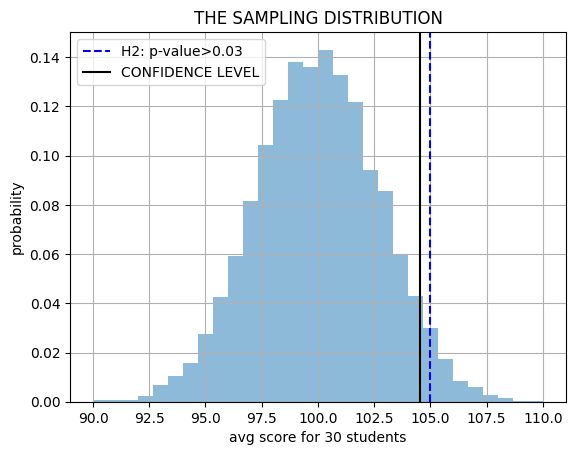

In [13]:
z = np.r_[[np.mean(m.rvs(30)) for _ in range(10000)]]

plt.hist(z, bins=30, density=True, alpha=.5);
plt.axvline(105, color="blue", ls="--",  label="H2: p-value>%.2f"%np.mean(z>105))
plt.grid(); plt.xlabel("avg score for 30 students"); plt.ylabel("probability")
plt.axvline(np.percentile(z, 95), color="black", label="CONFIDENCE LEVEL")
plt.legend(); plt.title("THE SAMPLING DISTRIBUTION"); plt.show()

**WE HAVE LEST TRUST IN OUR MODEL NOW!!** $\rightarrow$ **WHY?**


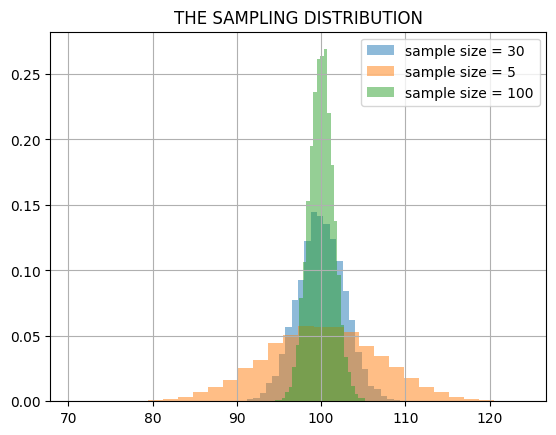

In [14]:
z1 = np.r_[[np.mean(m.rvs(30)) for _ in range(10000)]]
z2 = np.r_[[np.mean(m.rvs(5)) for _ in range(10000)]]
z3 = np.r_[[np.mean(m.rvs(100)) for _ in range(10000)]]

plt.hist(z1, bins=30, density=True, alpha=.5, label="sample size = 30");
plt.hist(z2, bins=30, density=True, alpha=.5, label="sample size = 5");
plt.hist(z3, bins=30, density=True, alpha=.5, label="sample size = 100");
plt.grid(); plt.legend(); plt.title("THE SAMPLING DISTRIBUTION"); plt.show()
plt.show();



## Terminology

- **NULL HYPOTHESIS** $H_0$: The model we are testing whether we can reject it or not.
- **REAL WORLD SAMPLE**: What we measure in reality to a limited number of objects.
- **TEST STATISTIC**: What we compute from the real world sample (the average, in our case).
- **SAMPLING DISTRIBUTION**: The distribution of simulating **many** real world examples and computing the test statistic to each of them.
- **p-value**: The probability of seeing in the simulation something as **rare** as our real world example.
- **CONFIDENCE LEVEL**: The minimum p-value we are willing to observe to NOT consider to distrust $H_0$
- **REJECT $H_0$**: When we observe a p-value lower than the confidence level, meaning that our real world sample is **too rare**.
- **FAIL TO REJECT $H_0$**: When we observe a p-value higher than the confidence level, meaning that our real world sample is **fairly normal**.
- **MONTE CARLO SIMULATION**: What we did!!!


## Simulations and Formulas

We do simulation because we have computers. When these tests were invented, computers were not around, so people developed tables and formulas to compute **by hand** the p-values.

If **simulating is hard** we can always use the analytical formula.

$$p_{value} = 1 - \mathcal{N}(0,1).\text{cdf}\Big( \frac{\bar{x}-\mu}{\sigma / \sqrt{n}} \Big) $$

Where $\mathcal{N}(0,1).\text{cdf}$ is the Cummulative Density Function of the Standard Normal distribution

In [15]:
real_world_sample_mean = 105
real_world_sample_size = 5
model_mu = 100
model_sigma = 15

In [16]:
z = np.r_[[np.mean(m.rvs(real_world_sample_size)) for _ in range(10000)]]
print ("simulated p-value %.3f"%np.mean(real_world_sample_mean<z))

simulated p-value 0.223


In [17]:
print ("analytical, p-value %.3f"%(1-stats.norm().cdf((real_world_sample_mean-model_mu)\
                                                    /(model_sigma/np.sqrt(real_world_sample_size)))))

analytical, p-value 0.228





For more info:

- Sampling distribution of the sample mean [Khan Academy](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/sampling-distribution-of-the-sample-mean)

- Central limit theorem [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)